In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lib.minisom_new as minisom
from sklearn.preprocessing import MinMaxScaler
%config IPCompleter.greedy=True

In [20]:
dataset = pd.read_csv("data/pov_12.csv", header=None, sep="\s")

/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null object
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [22]:
dataset.head()

,0,1,2
0,0.109393,0.085409,Cluster1
1,0.082571,0.101796,Cluster1
2,0.084990,0.113641,Cluster1
3,0.114611,0.115524,Cluster1
4,0.097356,0.095484,Cluster1


In [23]:
dataset[2] = dataset[2].replace({"Cluster1": 0, "Cluster2": 1, "Cluster3": 2})

In [24]:
dataset.head()

,0,1,2
0,0.109393,0.085409,0
1,0.082571,0.101796,0
2,0.084990,0.113641,0
3,0.114611,0.115524,0
4,0.097356,0.095484,0


In [25]:
dataset.isna().any()

0    False
1    False
2    False
dtype: bool

In [26]:
x = dataset.iloc[:,:2].values
y = dataset.iloc[:,2].values

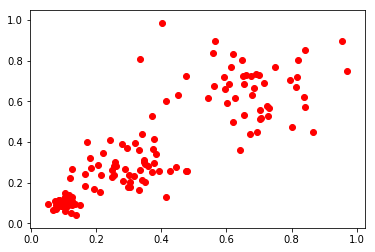

In [27]:
plt.scatter(x[:,0], x[:,1], c="r")
plt.show()

In [28]:
som = minisom.MiniSom(x = 7, y = 7, input_len=2, sigma=1.0, learning_rate=0.2)

In [29]:
som.random_weights_init(x)

In [30]:
som.train_random(data = x, num_iteration=100)

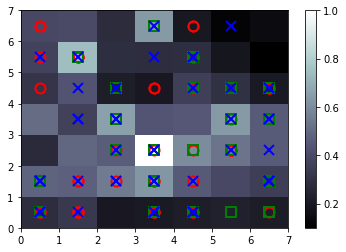

<Figure size 720x720 with 0 Axes>

In [31]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
marker = ['o', 's', 'x']
colors = ['r', 'g', 'b']

for i, x_ in enumerate(x):
    w = som.winner(x_)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
            marker[y[i]],
            markeredgecolor=colors[y[i]],
            markerfacecolor = 'None',
            markersize=10,
            markeredgewidth=2
    )
plt.figure(figsize=(10,10))
plt.show()

In [32]:
mapping = som.win_map(x)

In [33]:
mapping

defaultdict(list,
            {(4, 0): [array([ 0.1093931 ,  0.08540945]),
              array([ 0.1035013 ,  0.08033983]),
              array([ 0.1125485 ,  0.08980322]),
              array([ 0.30241914,  0.23868579]),
              array([ 0.37844287,  0.29680748]),
              array([ 0.33605196,  0.26089102]),
              array([ 0.35989652,  0.27933646]),
              array([ 0.70303292,  0.55855533]),
              array([ 0.62046381,  0.49950654]),
              array([ 0.73182946,  0.56480327]),
              array([ 0.7248756 ,  0.57869687]),
              array([ 0.96906114,  0.75052998])],
             (4, 4): [array([ 0.08257057,  0.10179643]),
              array([ 0.31788735,  0.3929813 ]),
              array([ 0.64810876,  0.80176865])],
             (1, 5): [array([ 0.08498981,  0.11364122]),
              array([ 0.10590385,  0.14671171]),
              array([ 0.08317696,  0.11053706]),
              array([ 0.20719838,  0.28596983]),
              array([ 0.6

In [34]:
labels = som.labels_map(x,y)

In [35]:
labels

defaultdict(list,
            {(4, 0): Counter({0: 3, 1: 4, 2: 5}),
             (4, 4): Counter({0: 1, 1: 1, 2: 1}),
             (1, 5): Counter({0: 3, 1: 1, 2: 1}),
             (4, 6): Counter({0: 2}),
             (3, 0): Counter({0: 4, 1: 1, 2: 3}),
             (4, 2): Counter({0: 1, 1: 1}),
             (4, 1): Counter({0: 1, 2: 1}),
             (3, 1): Counter({0: 2, 1: 3, 2: 2}),
             (4, 5): Counter({0: 4, 1: 1, 2: 2}),
             (5, 3): Counter({0: 1, 1: 2, 2: 1}),
             (5, 2): Counter({0: 4, 1: 4, 2: 1}),
             (0, 4): Counter({0: 1}),
             (2, 2): Counter({0: 1, 1: 1, 2: 1}),
             (6, 4): Counter({0: 3, 1: 1, 2: 2}),
             (0, 6): Counter({0: 2}),
             (2, 1): Counter({0: 1, 2: 2}),
             (1, 0): Counter({0: 4, 2: 1}),
             (6, 0): Counter({0: 1, 1: 3}),
             (0, 0): Counter({0: 4, 1: 10, 2: 3}),
             (1, 1): Counter({0: 2, 2: 1}),
             (3, 4): Counter({0: 2}),
             (0

In [36]:
x_test = np.array([[0.1, 0.1], [0.8,0.8], [0.5, 0.5], [0.74099143, 0.55525575], [0.3704474 , 0.22861904]])
for item in x_test:
    w = som.winner(item)
    print(item, "is at position:", w)

[ 0.1  0.1] is at position: (4, 6)
[ 0.8  0.8] is at position: (4, 6)
[ 0.5  0.5] is at position: (4, 6)
[ 0.74099143  0.55525575] is at position: (6, 1)
[ 0.3704474   0.22861904] is at position: (0, 0)
